### 🧾 Introduction

This dataset contains academic, demographic, and behavioral information about students, aimed at analyzing the factors that influence **student academic performance**, measured using **Grade Point Average (GPA)**.

Each record represents an individual student and includes attributes such as **age, gender, ethnicity, study habits, absences, parental education and support, tutoring participation, and involvement in extracurricular activities**.  
The target variable, **GPA**, reflects overall academic achievement on a standardized scale.


### 🎯 Objective

- Understand the **structure and distribution** of the dataset.
- Identify **key factors** that influence student GPA.
- Detect **patterns, trends, and potential anomalies** in the data.
- Prepare the dataset for **machine learning model development**.
- Use insights from the analysis to guide **feature selection, model building, and interpretation**, supporting the development of a reliable GPA prediction system.


In [ ]:
!pip install seaborn
!pip install lightgbm
!pip install xgboost

In [70]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns

In [71]:
df = pd.read_csv("Student_dataset.csv")

### 📊 Overview of the Data

The dataset provides a comprehensive view of student performance by combining academic behavior, family background, and extracurricular involvement.  
It enables both **exploratory analysis** and **predictive modeling** to understand how different factors contribute to variations in GPA.


In [72]:
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [73]:
df.shape

(2392, 15)

In [74]:
df.columns

Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'],
      dtype='object')

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [76]:
df.isnull().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [77]:
df.duplicated().sum()

np.int64(0)

In [78]:
df.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


## 📌 About the Dataset

- The dataset contains **2,392 rows** and **15 columns**.
- No **missing values** or **duplicate records** were found in the dataset.
- All columns have **appropriate data types** and appear to be **consistent**.
- No significant **outliers** were detected in the dataset.
- The **target variable** is **GPA**, which is a **continuous numerical variable**.


#### data preprocessing and cleaning

In [79]:
# removing the unwanted columns
df.drop(columns=["StudentID","GradeClass"], inplace=True)
df.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061


In [80]:
# updating the colums for the EDA
df['Gender'] =df["Gender"].replace({0:"Male",1:"Female"})
df['Ethnicity'] =df['Ethnicity'].replace({0:"Caucasian",1:"African American",2:"Asian",3:"Other"})
df['ParentalEducation'] = df['ParentalEducation'].replace({0:"None",1:"High School",2:"Some College",3:"Bachelor's",4:"Higher"})
df['StudyTimeWeekly'] = df['StudyTimeWeekly'].round().astype("int")
df['Tutoring'] =df["Tutoring"].replace({0:"No",1:"Yes"})
df['ParentalSupport'] = df["ParentalSupport"].replace({0:"None", 1:"Low", 2:"Moderate", 3:"High",4:"Very High"})
df['Extracurricular'] =df["Extracurricular"].replace({0:"No",1:"Yes"})
df['Sports'] =df["Sports"].replace({0:"No",1:"Yes"})
df['Music'] =df["Music"].replace({0:"No",1:"Yes"})
df['Volunteering'] =df["Volunteering"].replace({0:"No",1:"Yes"})

df['GPA'] = df['GPA'].round(2)

In [81]:
df.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA
0,17,Female,Caucasian,Some College,20,7,Yes,Moderate,No,No,Yes,No,2.93
1,18,Male,Caucasian,High School,15,0,No,Low,No,No,No,No,3.04
2,15,Male,Asian,Bachelor's,4,26,No,Moderate,No,No,No,No,0.11
3,17,Female,Caucasian,Bachelor's,10,14,No,High,Yes,No,No,No,2.05
4,17,Female,Caucasian,Some College,5,17,Yes,High,No,No,No,No,1.29


In [82]:
# Creating the new columns that show the how much activity done by student from All four activities to No activity


activity_cols = ['Extracurricular', 'Sports', 'Music', 'Volunteering']

# Function to collect all "Yes" activities
def collect_activities(row):
    activities = [col for col in activity_cols if row[col] == "Yes"]
    
    # Special case: if all are Yes
    if len(activities) == len(activity_cols):
        return "All Activities"
    elif len(activities) == 3:
        return "Three activities"
    elif len(activities) == 2:
        return "Two activities"
    elif len(activities) == 1:
        return "One activity"
    else:
        return "No activity"
    
    # Normal case
    return ", ".join(activities) if activities else "No Activity"

# Apply function row-wise
df['AllActivities'] = df.apply(collect_activities, axis=1)
df.head()


,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,AllActivities
0,17,Female,Caucasian,Some College,20,7,Yes,Moderate,No,No,Yes,No,2.93,One activity
1,18,Male,Caucasian,High School,15,0,No,Low,No,No,No,No,3.04,No activity
2,15,Male,Asian,Bachelor's,4,26,No,Moderate,No,No,No,No,0.11,No activity
3,17,Female,Caucasian,Bachelor's,10,14,No,High,Yes,No,No,No,2.05,One activity
4,17,Female,Caucasian,Some College,5,17,Yes,High,No,No,No,No,1.29,No activity


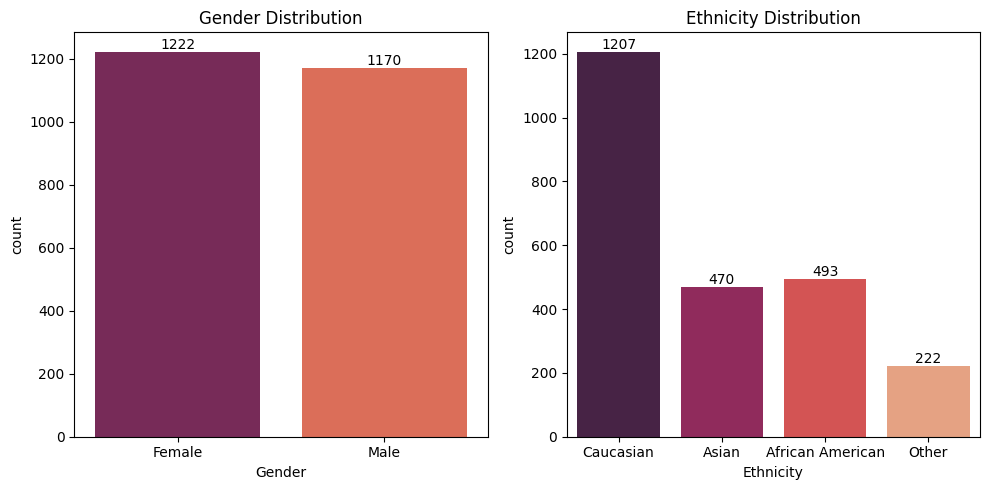

In [83]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.countplot(data=df,x='Gender', ax=axes[0], palette='rocket')
axes[0].set_title("Gender Distribution")
for container in axes[0].containers:
    axes[0].bar_label(container)
    
sns.countplot(data=df,x='Ethnicity', ax=axes[1], palette='rocket')
axes[1].set_title("Ethnicity Distribution")
for container in axes[1].containers:
    axes[1].bar_label(container)
plt.tight_layout()
plt.show()



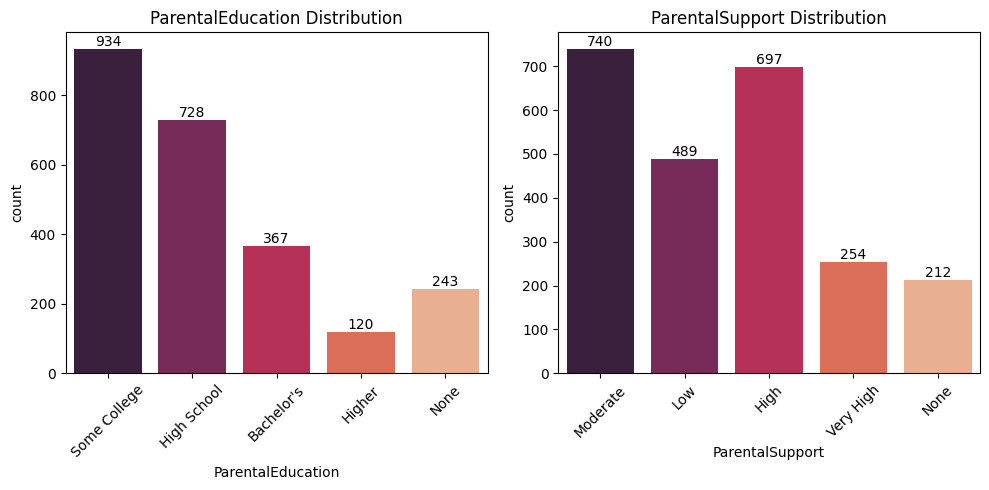

In [84]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.countplot(data=df,x='ParentalEducation', ax=axes[0], palette='rocket')
axes[0].set_title("ParentalEducation Distribution")
axes[0].tick_params(axis='x', labelrotation=45)
for container in axes[0].containers:
    axes[0].bar_label(container)
    
sns.countplot(data=df,x='ParentalSupport', ax=axes[1], palette='rocket')
axes[1].set_title("ParentalSupport Distribution")
axes[1].tick_params(axis='x', labelrotation=45)
for container in axes[1].containers:
    axes[1].bar_label(container)
plt.tight_layout()
plt.show()

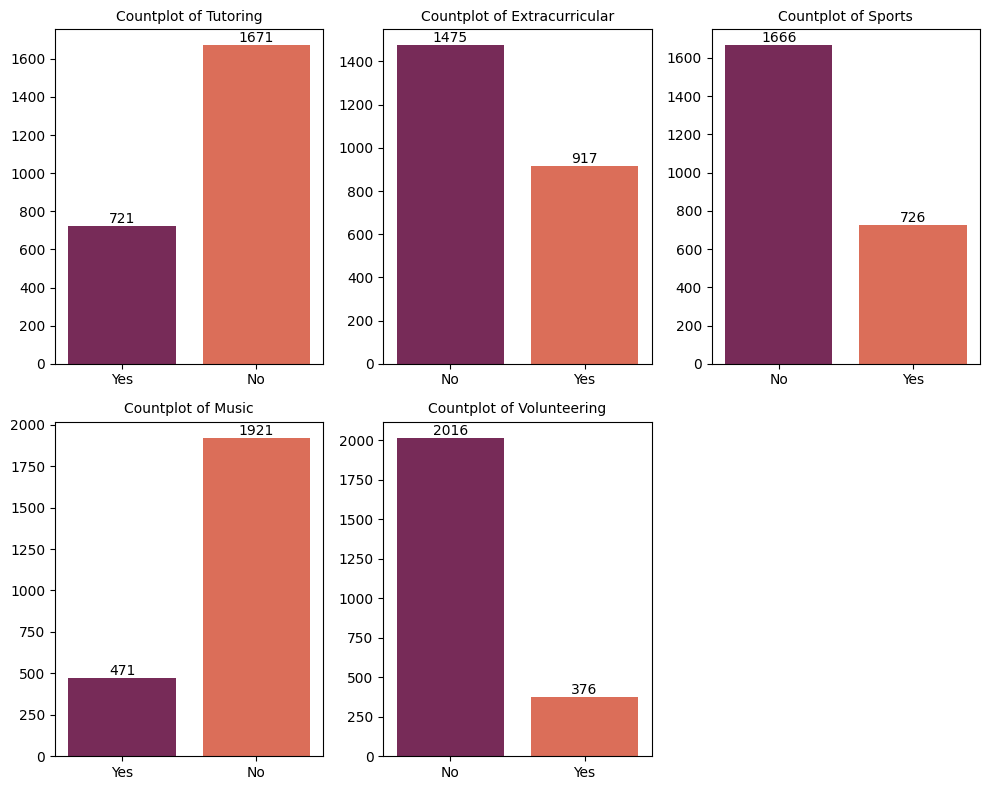

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['Tutoring','Extracurricular', 'Sports',
        'Music', 'Volunteering']

# Set up subplot grid
n = len(cols)
rows = (n + 2) // 3  # 3 plots per row
fig, axes = plt.subplots(rows, 3, figsize=(10, 4 * rows))
axes = axes.flatten()  # flatten to 1D for easy indexing

for idx, col in enumerate(cols):
    ax = axes[idx]
    sns.countplot(data=df, x=col, ax=ax, palette="rocket")
    for container in ax.containers:
        ax.bar_label(container, fontsize=10)
    ax.set_title(f"Countplot of {col}", fontsize=10)
    ax.set_xlabel("",fontsize=10)
    ax.set_ylabel("")


# Hide unused subplots if any
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

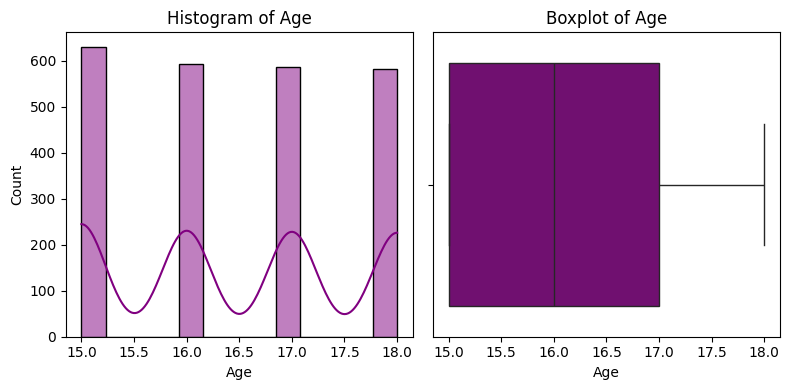

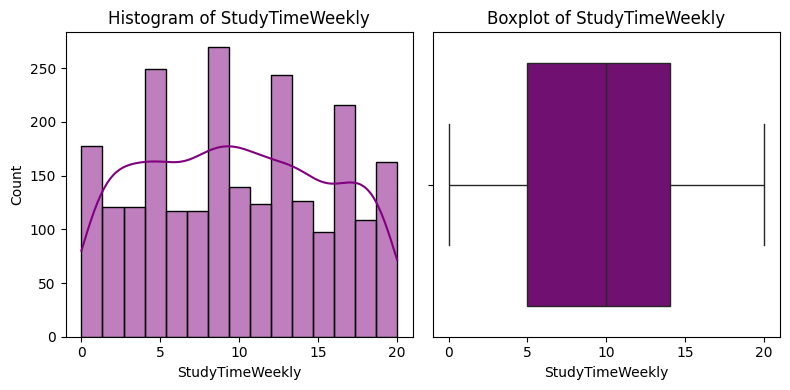

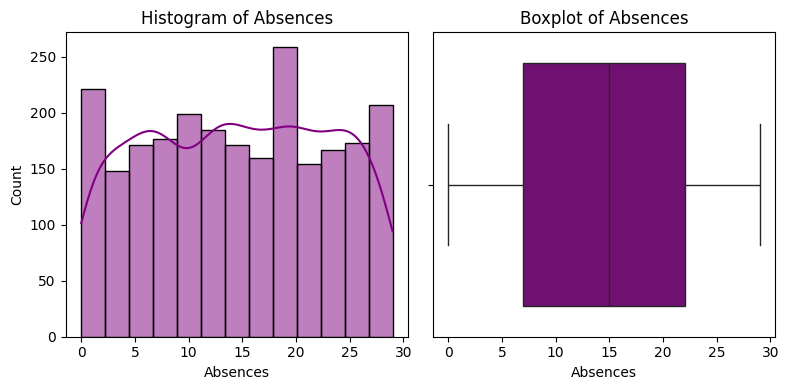

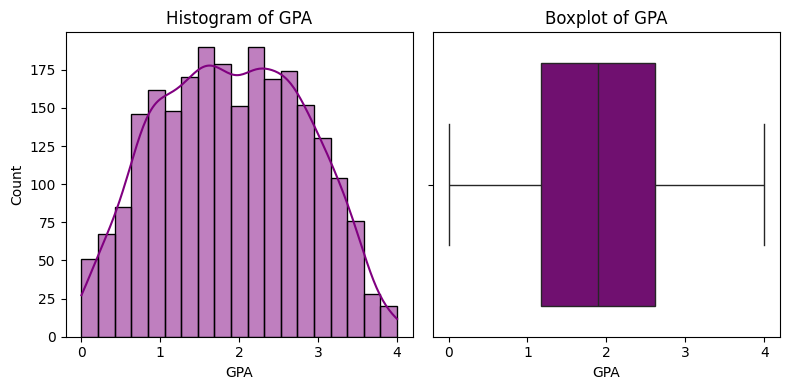

In [86]:
df_num = df.select_dtypes(include=['int64','float64'])

import seaborn as sns
import matplotlib.pyplot as plt

for col in df_num.columns:
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))

    # Histogram
    sns.histplot(data=df, x=col, kde=True, ax=axes[0], color='purple')
    axes[0].set_title(f"Histogram of {col}")

    # Boxplot
    sns.boxplot(data=df, x=col, ax=axes[1], color='purple')
    axes[1].set_title(f"Boxplot of {col}")

    plt.tight_layout()
    plt.show()


📝 **univarient analysis** 

📌 gender are both balanced

📌 Caucasian students form the majority of the dataset

📌 Most parents have education levels of Some College or High School.

📌 Fewer parents have Bachelor’s or Higher education.

📌 Moderate and High parental support are the most common.

📌 Very High and No support categories are less frequent.

📌 A large majority of students do not attend tutoring.

📌 More students do not participate in extracurricular activities.

📌 Most students do not participate in sports.

📌 A very small proportion of students are involved in music.

📌 Volunteering participation is rare compared to non-participation.

📌 No major outliers across numeric features → minimal data cleaning needed.

📌 Dataset is well-suited for machine learning, especially regression-based GPA prediction.

In [87]:
df_num.describe()

,Age,StudyTimeWeekly,Absences,GPA
count,2392.000000,2392.000000,2392.000000,2392.000000
mean,16.468645,9.767977,14.541388,1.906162
std,1.123798,5.669491,8.467417,0.915192
min,15.000000,0.000000,0.000000,0.000000
25%,15.000000,5.000000,7.000000,1.170000
50%,16.000000,10.000000,15.000000,1.890000
75%,17.000000,14.000000,22.000000,2.620000
max,18.000000,20.000000,29.000000,4.000000


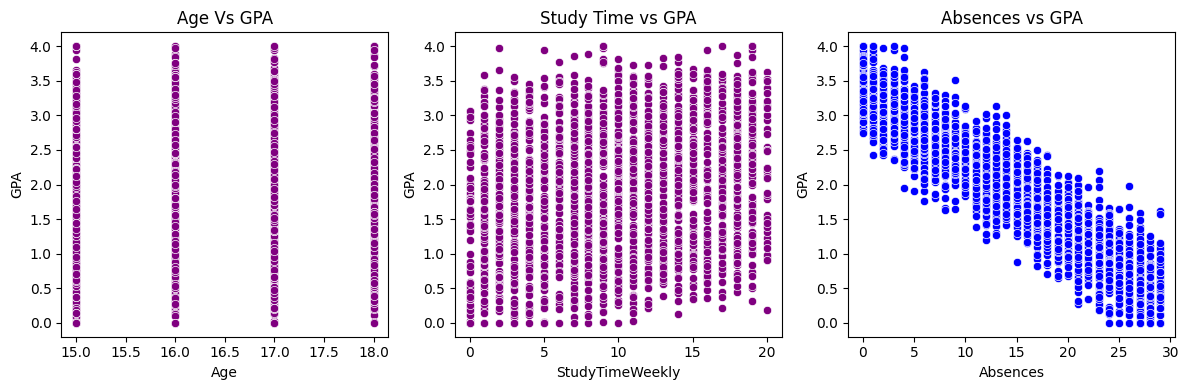

In [88]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
sns.scatterplot(data=df_num, x='Age', y='GPA', ax=axes[0], color='purple')
axes[0].set_title('Age Vs GPA')
sns.scatterplot(data =df_num, x='StudyTimeWeekly', y='GPA', ax=axes[1], color='purple')
axes[1].set_title('Study Time vs GPA')
sns.scatterplot(data =df_num, x='Absences', y='GPA', ax=axes[2], color='blue')
axes[2].set_title('Absences vs GPA')

plt.tight_layout()
plt.show()


In [89]:
df_num.corr()

,Age,StudyTimeWeekly,Absences,GPA
Age,1.000000,-0.003604,-0.011511,0.000273
StudyTimeWeekly,-0.003604,1.000000,0.009283,0.179237
Absences,-0.011511,0.009283,1.000000,-0.919302
GPA,0.000273,0.179237,-0.919302,1.000000


In [90]:
cols = ['Gender','Ethnicity','ParentalEducation','Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports',
        'Music', 'Volunteering']

for col in cols:
    print(df.groupby(col)['GPA'].agg(['mean', 'count']))
    print("-" * 40)


            mean  count
Gender                 
Female  1.894124   1222
Male    1.918735   1170
----------------------------------------
                      mean  count
Ethnicity                        
African American  1.946491    493
Asian             1.922191    470
Caucasian         1.875824   1207
Other             1.947613    222
----------------------------------------
                       mean  count
ParentalEducation                 
Bachelor's         1.809019    367
High School        1.943777    728
Higher             1.816250    120
None               1.893128    243
Some College       1.929957    934
----------------------------------------
              mean  count
Tutoring                 
No        1.818941   1671
Yes       2.108308    721
----------------------------------------
                     mean  count
ParentalSupport                 
High             2.042410    697
Low              1.755542    489
Moderate         1.884257    740
None             1.540

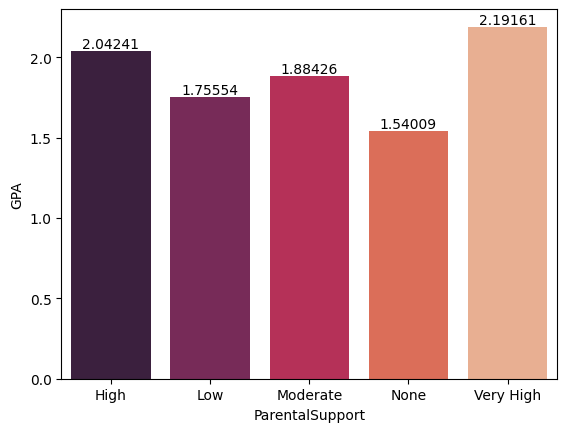

In [91]:
ax = sns.barplot(df.groupby('ParentalSupport')['GPA'].mean(), palette='rocket')
for container in ax.containers:
    ax.bar_label(container)

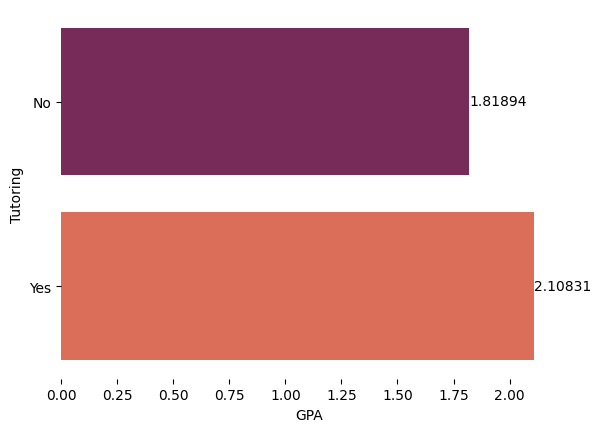

In [92]:

ax = sns.barplot(df.groupby('Tutoring')['GPA'].mean(), orient='h', palette='rocket')

for spine in ax.spines.values():
    spine.set_visible(False)

    
for container in ax.containers:
    ax.bar_label(container)


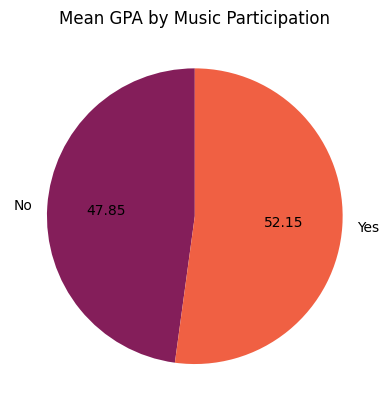

In [93]:
# Compute mean GPA by Music
music_gpa = df.groupby('Music')['GPA'].mean()

colors = sns.color_palette("rocket", len(music_gpa))
# Pie chart
plt.pie(
    music_gpa, 
    labels=music_gpa.index, 
    autopct='%1.2f',   # show values (mean GPA) instead of percentages
    startangle=90,
    colors = colors
)
plt.title("Mean GPA by Music Participation")
plt.show()


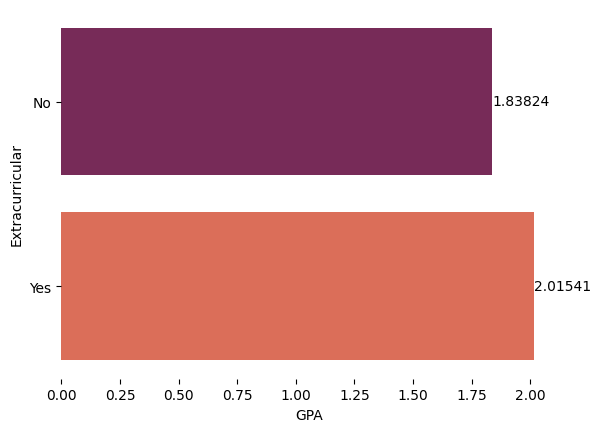

In [94]:
ax = sns.barplot(df.groupby('Extracurricular')['GPA'].mean(), orient='h', palette='rocket')

for spine in ax.spines.values():
    spine.set_visible(False)
        
for container in ax.containers:
    ax.bar_label(container)


Text(0.5, 1.0, 'Mean GPA by Activity Participation')

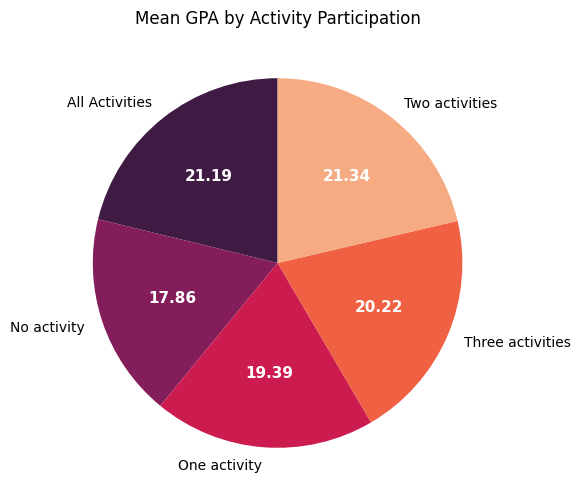

In [95]:
All_gpa = df.groupby('AllActivities')['GPA'].mean()
fig, ax = plt.subplots(figsize=(6,6))

wedges, texts, autotexts = ax.pie(
    All_gpa,
    labels=All_gpa.index,
    autopct='%1.2f',
    startangle=90,
    colors=sns.color_palette("rocket", len(All_gpa))
)

# Change number (autopct) color
for autotext in autotexts:
    autotext.set_color("white")   # or "black"
    autotext.set_fontsize(11)
    autotext.set_fontweight("bold")

ax.set_title("Mean GPA by Activity Participation")


In [96]:
parental = (df.groupby(['ParentalEducation', 'ParentalSupport'])['GPA'].agg(['mean','count']).reset_index())
parental.sort_values(by='mean', ascending=False)

,ParentalEducation,ParentalSupport,mean,count
14,Higher,Very High,2.340000,9
19,None,Very High,2.314348,23
9,High School,Very High,2.240000,72
4,Bachelor's,Very High,2.200333,30
24,Some College,Very High,2.125750,120
20,Some College,High,2.098120,266
0,Bachelor's,High,2.040286,105
15,None,High,2.038254,63
5,High School,High,2.008106,227
7,High School,Moderate,1.941368,234


## 🔑 Key Insights (Bivariate Analysis)

### 📉 Student Absences vs GPA
- Student absences play a major role in GPA  
- Higher absences → clearly lower GPA  
- Attendance is a strong driver of academic performance  

### 👨‍👩‍👧 Parental Support vs GPA
- Parental support has a strong positive impact on GPA  
- Students with **High / Very High** parental support consistently perform better  
- Support level matters more than parents’ education level  

### 📘 Tutoring vs GPA
- Tutoring helps improve academic performance  
- Students who attend tutoring show noticeably higher GPA compared to non-tutored students  

### 🏃 Participation in Activities vs GPA
- Participation in activities improves GPA  
- Students involved in **one or more activities** perform better than students with no activities  
- Multiple activities show slightly better outcomes than a single activity  

### 🎵 Music Learning vs GPA
- Music learners perform better academically  
- Students learning music have higher average GPA  
- Indicates better discipline, focus, and cognitive benefits  

### 🎭 Extracurricular Activities vs GPA
- Extracurricular participation is beneficial  
- Students involved in extracurricular activities outperform those who are not  


### Modeling Building

In [97]:
data = pd.get_dummies(df)
data.head()

,Age,StudyTimeWeekly,Absences,GPA,Gender_Female,Gender_Male,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian,Ethnicity_Other,...,Sports_Yes,Music_No,Music_Yes,Volunteering_No,Volunteering_Yes,AllActivities_All Activities,AllActivities_No activity,AllActivities_One activity,AllActivities_Three activities,AllActivities_Two activities
0,17,20,7,2.93,True,False,False,False,True,False,...,False,False,True,True,False,False,False,True,False,False
1,18,15,0,3.04,False,True,False,False,True,False,...,False,True,False,True,False,False,True,False,False,False
2,15,4,26,0.11,False,True,False,True,False,False,...,False,True,False,True,False,False,True,False,False,False
3,17,10,14,2.05,True,False,False,False,True,False,...,False,True,False,True,False,False,False,True,False,False
4,17,5,17,1.29,True,False,False,False,True,False,...,False,True,False,True,False,False,True,False,False,False


In [98]:
data.columns

Index(['Age', 'StudyTimeWeekly', 'Absences', 'GPA', 'Gender_Female',
       'Gender_Male', 'Ethnicity_African American', 'Ethnicity_Asian',
       'Ethnicity_Caucasian', 'Ethnicity_Other',
       'ParentalEducation_Bachelor's', 'ParentalEducation_High School',
       'ParentalEducation_Higher', 'ParentalEducation_None',
       'ParentalEducation_Some College', 'Tutoring_No', 'Tutoring_Yes',
       'ParentalSupport_High', 'ParentalSupport_Low',
       'ParentalSupport_Moderate', 'ParentalSupport_None',
       'ParentalSupport_Very High', 'Extracurricular_No',
       'Extracurricular_Yes', 'Sports_No', 'Sports_Yes', 'Music_No',
       'Music_Yes', 'Volunteering_No', 'Volunteering_Yes',
       'AllActivities_All Activities', 'AllActivities_No activity',
       'AllActivities_One activity', 'AllActivities_Three activities',
       'AllActivities_Two activities'],
      dtype='object')

In [99]:
y = data['GPA']
x = data[['Age', 'StudyTimeWeekly', 'Absences', 'Gender_Female',
       'Gender_Male', 'Ethnicity_African American', 'Ethnicity_Asian',
       'Ethnicity_Caucasian', 'Ethnicity_Other',
       "ParentalEducation_Bachelor's", 'ParentalEducation_High School',
       'ParentalEducation_Higher', 'ParentalEducation_None',
       'ParentalEducation_Some College', 'Tutoring_No', 'Tutoring_Yes',
       'ParentalSupport_High', 'ParentalSupport_Low',
       'ParentalSupport_Moderate', 'ParentalSupport_None',
       'ParentalSupport_Very High', 'Extracurricular_No',
       'Extracurricular_Yes', 'Sports_No', 'Sports_Yes', 'Music_No',
       'Music_Yes', 'Volunteering_No', 'Volunteering_Yes',
       'AllActivities_All Activities', 'AllActivities_No activity',
       'AllActivities_One activity', 'AllActivities_Three activities',
       'AllActivities_Two activities']]

In [100]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y, test_size=0.2, random_state=42)
from  sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train) 
x_test_scaled = sc.transform(x_test)

In [101]:
# regression linear

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Linear_model = LinearRegression()
Linear_model.fit(x_train_scaled,y_train)
y_pred = Linear_model.predict(x_test_scaled)

mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
rmse = np.sqrt(mse) 

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)

MAE: 0.15550497424468315
MSE: 0.03873086952690296
RMSE: 0.19680159940128272
R²: 0.9531643994866295


In [103]:
#polynomial regression
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)

x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)


model = LinearRegression()
model.fit(x_train_poly,y_train)
y_pred - model.predict(x_test_poly)
# Metrics
mae  = mean_absolute_error(y_test, y_pred)
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2   = r2_score(y_test, y_pred)

print("MAE :", mae)
print("MSE :", mse)
print("RMSE:", rmse)
print("R²  :", r2)

MAE : 0.15550497424468315
MSE : 0.03873086952690296
RMSE: 0.19680159940128272
R²  : 0.9531643994866295


In [110]:
from sklearn.linear_model import Lasso, Ridge
ridge = Ridge(alpha=0.1)
ridge.fit(x_train_scaled,y_train)
y_pred = ridge.predict(x_test_scaled)
mae  = mean_absolute_error(y_test, y_pred)
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2   = r2_score(y_test, y_pred)

print("Ridge MAE :", mae)
print("Ridge MSE :", mse)
print("Ridge RMSE:", rmse)
print("Ridge R²  :", r2)

Ridge MAE : 0.15550799911122729
Ridge MSE : 0.03873219609719199
Ridge RMSE: 0.19680496969637729
Ridge R²  : 0.9531627953213507


In [105]:
lasso = Lasso(alpha=0.01, max_iter=10000)
lasso.fit(x_train_scaled, y_train)

y_pred = lasso.predict(x_test_scaled)

mae  = mean_absolute_error(y_test, y_pred)
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2   = r2_score(y_test, y_pred)

print("Lasso MAE :", mae)
print("Lasso MSE :", mse)
print("Lasso RMSE:", rmse)
print("Lasso R²  :", r2)

Lasso MAE : 0.15810476210396762
Lasso MSE : 0.04074694155560868
Lasso RMSE: 0.20185871681849332
Lasso R²  : 0.9507264489501187


In [106]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
mae  = mean_absolute_error(y_test, y_pred)
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2   = r2_score(y_test, y_pred)
print("RF MAE :", mae)
print("RF MSE :", mse)
print("RF RMSE:", rmse)
print("RF R²  :", r2)

RF MAE : 0.1938365083507307
RF MSE : 0.0621121260856312
RF RMSE: 0.24922304485266045
RF R²  : 0.9248904359773783


In [108]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

xgb = XGBRegressor(
    n_estimators = 200,
    random_state=42
)
xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_test)

mae  = mean_absolute_error(y_test, y_pred)
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2   = r2_score(y_test, y_pred)

print("XGBoost MAE :", mae)
print("XGBoost MSE :", mse)
print("XGBoost RMSE:", rmse)
print("XGBoost R²  :", r2)

lgbm = LGBMRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=-1,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

lgbm.fit(x_train,y_train)
y_pred = lgbm.predict(x_test)
# Metrics


# Metrics
mae  = mean_absolute_error(y_test, y_pred)
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2   = r2_score(y_test, y_pred)

print("LightGBM MAE :", mae)
print("LightGBM MSE :", mse)
print("LightGBM RMSE:", rmse)
print("LightGBM R²  :", r2)

XGBoost MAE : 0.1987369976990656
XGBoost MSE : 0.0625983879101502
XGBoost RMSE: 0.250196698439748
XGBoost R²  : 0.9243024201430771
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000090 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 116
[LightGBM] [Info] Number of data points in the train set: 1913, number of used features: 33
[LightGBM] [Info] Start training from score 1.901124
LightGBM MAE : 0.17894649843437732
LightGBM MSE : 0.0502124313836224
LightGBM RMSE: 0.22408130529703366
LightGBM R²  : 0.9392802329042773


| Model                 | R²         | RMSE       | Verdict        |
| --------------------- | ---------- | ---------- | -------------- |
| **Linear Regression** | **0.9532** | **0.1968** | 🥇 **BEST**    |
| Polynomial Regression | 0.9532     | 0.1968     | ❌ No gain      |
| Ridge Regression      | 0.9532     | 0.1968     | Same as Linear |
| Lasso Regression      | 0.9507     | 0.2019     | Slightly worse |
| LightGBM              | 0.9393     | 0.2241     | Good but worse |
| Random Forest         | 0.9249     | 0.2492     | Underperformed |
| XGBoost               | 0.9243     | 0.2502     | Underperformed |


##### Choosing the **linear regression** model

👉 Highest R²

👉 Lowest RMSE & MAE

👉 Simple & interpretable

👉 No overfitting

👉 Polynomial & boosting didn’t improve

👉 data is mostly linear
Tree/boosting models actually overfit noise here.

In [ ]:
import joblib
joblib.dump(Linear_model,"model.pkl")
joblib.dump(sc, "scaler.pkl")
joblib.dump(x.columns.tolist(),"feature_names.pkl")

['feature_names.pkl']

In [ ]:
import joblib
import pandas as pd

model = joblib.load("model.pkl")
sc = joblib.load("scaler.pkl")
feature_names = joblib.load("feature_names.pkl")


### Sample prediction

In [ ]:
input_data = {
    'Age': 17,
    'StudyTimeWeekly': 12,
    'Absences': 3,

    'Gender_Female': 0,
    'Gender_Male': 1,

    'Ethnicity_African American': 0,
    'Ethnicity_Asian': 1,
    'Ethnicity_Caucasian': 0,
    'Ethnicity_Other': 0,

    "ParentalEducation_Bachelor's": 1,
    'ParentalEducation_High School': 0,
    'ParentalEducation_Higher': 0,
    'ParentalEducation_None': 0,
    'ParentalEducation_Some College': 0,

    'Tutoring_No': 0,
    'Tutoring_Yes': 1,

    'ParentalSupport_High': 1,
    'ParentalSupport_Low': 0,
    'ParentalSupport_Moderate': 0,
    'ParentalSupport_None': 0,
    'ParentalSupport_Very High': 0,

    'Extracurricular_No': 0,
    'Extracurricular_Yes': 1,

    'Sports_No': 0,
    'Sports_Yes': 1,

    'Music_No': 0,
    'Music_Yes': 1,

    'Volunteering_No': 1,
    'Volunteering_Yes': 0,

    'AllActivities_All Activities': 0,
    'AllActivities_No activity': 0,
    'AllActivities_One activity': 0,
    'AllActivities_Three activities': 0,
    'AllActivities_Two activities': 1
}


In [ ]:
x_new = pd.DataFrame([input_data], columns=feature_names)
x_new_scaled = sc.transform(x_new)
y_pred = model.predict(x_new_scaled)

print("Predicted GPA:", y_pred[0])


Predicted GPA: 3.730650097510921
